<a href="https://colab.research.google.com/github/Suchith19792/Image-Video-Analysis/blob/master/Image_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Image

In [ ]:
import cv2
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
img = cv2.imread('Image2.jpg')
img2 = img[:,:,::-1]

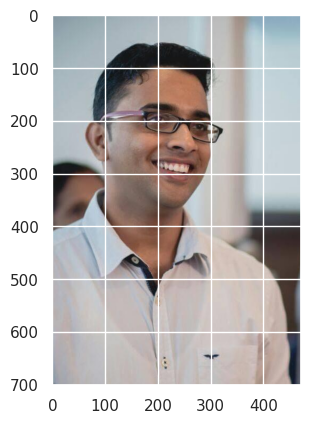

In [ ]:
plt.imshow(img2);

# Apply K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import numpy as np
from time import time

In [ ]:
n_colors = 4

In [ ]:
img_norm = img2/255
w,h,d = shape = img_norm.shape
assert d == 3
img_array = np.reshape(img_norm, (w*h,d))
print(img_array.shape)

(330171, 3)


In [ ]:
print("fitting model on a small sub sample of the data")
t0 = time()
img_array_sample = shuffle(img_array,random_state=0,n_samples=1000)
kmeans = KMeans(n_colors,random_state=0,n_init="auto").fit(img_array_sample)
print(f"time taken to model: {time() - t0:0.3f} secs")

fitting model on a small sub sample of the data
time taken to model: 0.037 secs


In [ ]:
print("Get label for all points")
t0 = time()
labels = kmeans.predict(img_array)
print(f"time taken: {time() - t0:0.3f} secs")

Get label for all points
time taken: 0.008 secs


In [ ]:
img_quantized = kmeans.cluster_centers_[labels].reshape(w,h,-1)

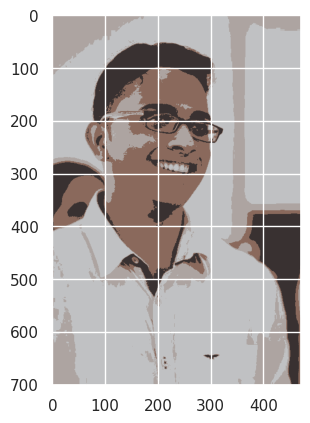

In [ ]:
plt.imshow(img_quantized);